In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Exercise 2.1

This exercise involves some short problems from ``chap02.ipynb``. We have run the code and solved the problems in each of them.

#### (a) Problem 2.1.1
From the given graph in Section 2.2, we added a node and a few more edges. We have also drawn the graph again.

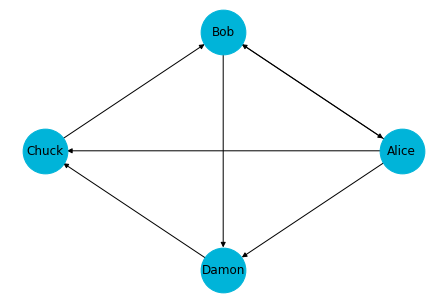

In [2]:
mygraph = nx.DiGraph()
mygraph.add_node('Alice')
mygraph.add_node('Bob')
mygraph.add_node('Chuck')
mygraph.add_node('Damon')
mygraph.add_edge('Alice','Bob')
mygraph.add_edge('Bob','Alice')
mygraph.add_edge('Chuck','Bob')
mygraph.add_edge('Alice','Chuck')
mygraph.add_edge('Alice', 'Damon')
mygraph.add_edge('Bob', 'Damon')
mygraph.add_edge('Damon', 'Chuck')
nx.draw_circular(mygraph,
                 node_color='#00b4d9',
                node_size=2000,
                 with_labels=True)

#### (b) Problem 2.1.2

From the given undirected graph in Section 2.3, we have added another city and another edge.

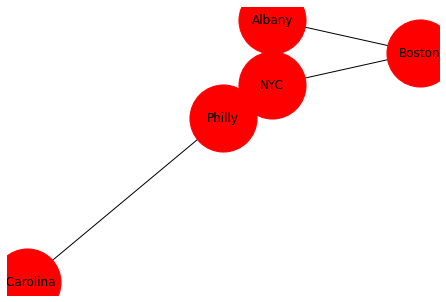

In [3]:
positions = dict(Albany=(-74,43),
                Boston=(-71,42),
                NYC=(-74,41),
                Philly=(-75,40),
                NCarolina = (-79,35))
drive_times = {('Albany', 'Boston'):3,
               ('Albany', 'NYC'):4,
               ('Boston', 'NYC'):4,
              ('NYC', 'Philly'):4,
              ('Philly','NCarolina'):6}

mygraph2 = nx.Graph()
mygraph2.add_nodes_from(positions)
mygraph2.add_edges_from(drive_times)

nx.draw(mygraph2, positions,
       node_color='#FF0000',
       node_size=4500,
       with_labels=True)

#### (c) Problem 2.1.3
We have modified the code in Sections 2.4-2.5 to draw a complete directed graph with five nodes.

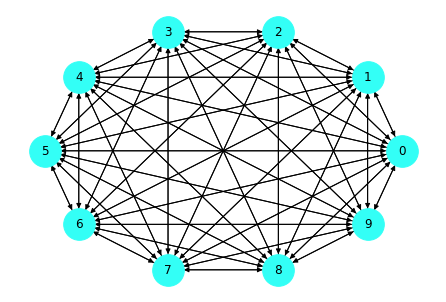

In [4]:
def all_direct_pairs(nodes):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            yield u, v
                
def make_complete_digraph(n): #n is the number of nodes
    G = nx.DiGraph()
    nodes = range(n) #not sure if xrange can also be used here
    G.add_nodes_from(nodes)
    G.add_edges_from(all_direct_pairs(nodes))
    return G

kumpletong_graph = make_complete_digraph(10)
nx.draw_circular(kumpletong_graph,
                 node_color='#33fff6',
                 node_size=1000,
                 with_labels=True)

#### (d) Problem 2.1.4
In the book, the function ``is_connected(G)`` checks whether an **undirected** graph is connected or not. What we want to do is to write a code that checks the connectedness of a directed graph.

In the literature, a connected digraph can be strongly connected or weakly connected. A **strongly connected** directed graph means that every pair of nodes are connected by a directed edge (Skiena 1990, p. 173 *c.f.* Wolfram Mathworld). On the other hand, a directed graph is **weakly connected** if there is undirected path between any two par of nodes. (Skiena 1990, p. 173 *c.f.* Wolfram Mathworld).

In our code, we will be using the definition for strongly connected directed graph.

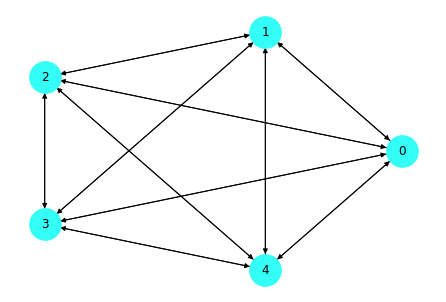

In [5]:
def flip(p):
    return np.random.random() < p

def random_digraph_pairs(nodes, p):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if flip(p):
                yield u, v
            
def make_random_digraph(n,p):
    if p <= 1:
        G = nx.DiGraph()
        nodes = range(n)
        G.add_nodes_from(nodes)
        G.add_edges_from(random_digraph_pairs(nodes, p))
        return G
    else:
        return print("This is not allowed.")

random_graph = make_random_digraph(5, 1)
nx.draw_circular(random_graph,
                 node_color='#33fff6',
                 node_size=1000,
                 with_labels=True)

In [6]:
def digraph_reachable_nodes(G,start):
    seen=set() #Create a set
    stack = [start]
    while stack:
        node = stack.pop() # pop removes the element from the set
        if node not in seen:
            seen.add(node) #add the nodes if they are not in seen
            stack.extend(G.neighbors(node))
    return seen

def is_digraph_connected(G):
    start = next(iter(G))
    reachable = digraph_reachable_nodes(G,start)
    if len(reachable) < len(G):
        return False
    else:
        return True

kumpleto = make_complete_digraph(5)
di_kumpleto = make_random_digraph(5, 0.4)

print(is_digraph_connected(di_kumpleto))
print(is_digraph_connected(kumpleto))

False
True


False

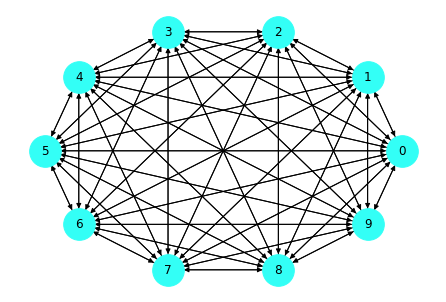

## Exercise 2.2

In Section 2.8 we analyzed the performance of ``reachable_nodes`` and classified it as $O(n+m)$, where $n$ is the number of nodes and $m$ is the number of edges. Continuing the analysis, what is the order of growth for ``is_connected``?

~~~python
def is_connected(G):
    start = list(G)[0]
    reachable = reachable_nodes(G, start)
    return len_reachable == len(G)
~~~

**Solution**:

Note that defining the function and writing the initial element of a list is constant in time. So the first two lines of the code are constant in time. Calling the ``reachable_nodes`` is also constant in time, but as shown is Section 2.8, the ``reachable_nodes`` function is of the order $O(n+m)$. Finally, as said in ThinkPython 2nd Ed., then ``len(G)`` operation is also constant in time (It was said that ``len`` is one of the exceptions, for most string and tuple operations are constant in time). Hence, the ``is_connected(G)`` function runs to the order $O(n+m)$.

## Exercise 2.3

In the implementation of ``reachable_nodes``, there seems to be an apparent inefficiency of adding *all* neighbors to the stack without checking whether they are already in ``seen``. 

The original code, written below, adds all neighbors without checking whether they are already in ``seen``:

~~~python
def reachable_nodes(G, start):
    seen = set() #initially, the set is empty
    stack = [start] #initially, the stack has one element, start
    while stack:
        node = stack.pop() #remove one node from the stack
        if node not in seen: #if node is not on seen, 
            seen.add(node)  #(1) add nodes to seen
            stack.extend(G.neighbors(node))#(2) add neighbors to the stack
    return seen #when the stack is empty, return seen
~~~

We write a version of this function that checks the neighbors before adding them to the stack. 

In [9]:
def reachable_nodes(G, start):
    seen = set() #initially, the set is empty
    stack = [start] #initially, the stack has one element, start
    while stack:
        node = stack.pop() #remove one node from the stack
        if node not in seen: #if node is not on seen, 
            seen.add(node)  #(1) add nodes to seen
            stack.extend(G.neighbors(node))#(2) add neighbors to the stack
    return seen #when the stack is empty, return seen

In [10]:
def reachable_nodes_modified(G, start):
    seen = set()
    stack = [start]
    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            old_neighbors = set(G.neighbors(node))
            new_neighbors = old_neighbors.difference(seen)
            stack.extend(new_neighbors)
    return seen

In [11]:
def all_pairs(nodes):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i>j:
                yield u, v
                
def make_complete_graph(n): #n is the number of nodes
    G = nx.Graph()
    nodes = range(n) #not sure if xrange can also be used here
    G.add_nodes_from(nodes)
    G.add_edges_from(all_pairs(nodes))
    return G

some_graph = make_complete_graph(100)
print(reachable_nodes(some_graph, 5))
print(reachable_nodes_modified(some_graph, 5))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99}
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99}


In the modified code, we used the function ``old_neighbors.difference(seen)``, which basically removes all elements from the set ``old_neighbors`` that are in ``seen``. The function effectively does what was expected. We have checked if the modified function will give the same output by constructing a complete graph and running the two codes on the same graph.

We also analyze the code given, and we determine whether the modification made the code faster. 

In [12]:
import time

def reachable_nodes_time(G, start):
    t_initial = time.perf_counter_ns()
    seen = set() #initially, the set is empty
    stack = [start] #initially, the stack has one element, start
    while stack:
        node = stack.pop() #remove one node from the stack
        if node not in seen: #if node is not on seen, 
            seen.add(node)  #(1) add nodes to seen
            stack.extend(G.neighbors(node))#(2) add neighbors to the stack
    t_final = time.perf_counter_ns()
    return seen, (t_final-t_initial)/(1*10**(9)) #when the stack is empty, return seen

def reachable_nodes_modified_time(G, start):
    t_initial = time.perf_counter_ns()
    seen = set()
    stack = [start]
    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            old_neighbors = set(G.neighbors(node))
            new_neighbors = old_neighbors.difference(seen)
            stack.extend(new_neighbors)
    t_final = time.perf_counter_ns()
    return seen, (t_final-t_initial)/(1*10**(9))

print("The time it takes for reachable_nodes_time(some_graph, 5) to run is", reachable_nodes_time(some_graph, 5)[1], "seconds")
print("The time it takes for reachable_nodes_modified_time(some_graph, 5) to run is", reachable_nodes_modified_time(some_graph, 5)[1], "seconds")

The time it takes for reachable_nodes_time(some_graph, 5) to run is 0.0031687 seconds
The time it takes for reachable_nodes_modified_time(some_graph, 5) to run is 0.0025374 seconds


In the above cell, we modified the functions we had earlier by adding time functions before and after the execution of the code. To do so, we used the function ``time.perf_counter_ns()`` to obtain a precise measure of the total time in ns. Then, we obtained the difference between the start and end times of the code, and then converted it to seconds. 

From our analysis, it appears that the modified function, ``reachable_nodes_modified``, is faster than the original code ``reachable_nodes``. 

## Exercise 2.4

There are two kinds of ER graphs. The one we generated in this chapter, $G(n, p)$, is characterized by two parameters: the number of nodes and the probability of an edge between two nodes.

An alternative definition, denoted by $G(n, m)$, is also characterized by two parameters: the number of nodes, $n$, and the number of edges, $m$. Under this definition, the number of edges is fixed, but their location is random.

In this exercise, we repeated the experiments done in the book using the second definition. 

*    We first have written a function ``m_pairs`` that takes a list of nodes and the number of edges, $m$, and returns a random selection of $m$ edges. This was done by generating a list of all possible edges and by using ``random_sample``.

*   We then have written a function called ``make_m_graph`` that takes $n$ and $m$ and returns a random graph with $n$ nodes and $m$ edges.

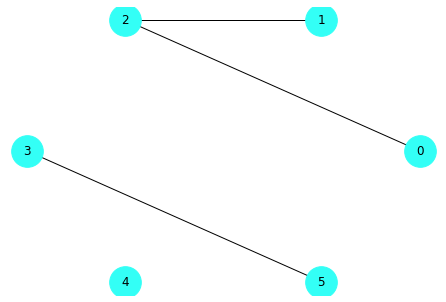

In [13]:
import random

def m_pairs(nodes, m):
    possible_pairs = [] 
    for i in all_pairs(nodes):
        possible_pairs.append(i)
    return random.sample(possible_pairs,m)

def make_m_graph(n,m):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(m_pairs(nodes,m))
    return G

random_m_graph = make_m_graph(6,3)
nx.draw_circular(random_m_graph,
                 node_color='#33fff6',
                 node_size=1000,
                 with_labels=True)

*    We have written a version of ``prob_connected`` that uses ``make_m_graph`` instead of ``make_random_graph``.

*    We finally computed the probability of connectivity for a range of values of $m$.

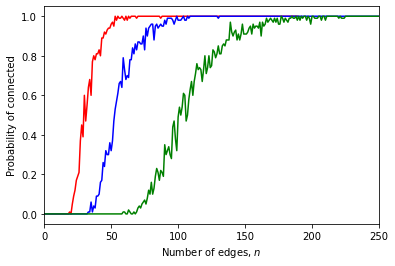

In [15]:
def is_connected(G):
    start = next(iter(G))
    reachable = reachable_nodes(G,start)
    return len(reachable) == len(G)

def prob_m_connected(n, m, iters=100):
    tf = [is_connected(make_m_graph(n, m)) for i in range(iters)]
    return np.mean(tf)

prob_m_connected(10,15)

n0 = 20
n1 = 30
n2 = 50


def all_of_it(n):
    return int(n*(n-1)/2)

def ms(n):
    return range(all_of_it(n))

def edge_prob(n):
    for p in np.linspace(0,1):
        return int(p*all_of_it(n))

def ys(n):
    return [prob_m_connected(n, m) for m in ms(n)]


plt.plot(ms(n0),ys(n0),"r-")
plt.plot(ms(n1),ys(n1),"b-")
plt.plot(ms(n2),ys(n2), "g-")
plt.xlabel("Number of edges, $n$")
plt.ylabel("Probability of connected")
plt.xlim(0,250)
#plt.xscale('log')
plt.show()
